In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
import talib as ta

In [2]:
data = yf.download("RELIANCE.NS",start ="2005-1-1",end = "2020-1-1", interval = '1D').dropna()
dd = data.copy()

[*********************100%***********************]  1 of 1 completed


In [3]:
def vwap(data):
    vp = data["Adj Close"]*data["Volume"]+data["Adj Close"].shift(1)*data["Volume"].shift(1)
    v = data["Volume"]+data["Volume"].shift(1)
    data["vwap"] = vp / v  
    
def ema(data):
    data["ema12"] = ta.EMA(data["Adj Close"],timeperiod = 12)
    data["ema26"] = ta.EMA(data["Adj Close"],timeperiod = 26)

    
def adx(data):
    data["adx"] = ta.ADX(data["High"], data["Low"],data["Adj Close"],timeperiod = 10)
    
def obv(data):
    data["obv"] = ta.OBV(data["Adj Close"],data["Volume"])/10**6
    
    
def atr(data):
    data["atr"] = ta.ATR(data["High"],data["Low"],data["Close"])
    
def bbands(data):
    data['BBANDS_U'] = ta.BBANDS(data["Close"], timeperiod=21)[0]
    data['BBANDS_M'] = ta.BBANDS(data["Close"], timeperiod=21)[1]
    data['BBANDS_L'] = ta.BBANDS(data["Close"], timeperiod=21)[2]
    

In [4]:
vwap(dd)
ema(dd)
adx(dd)
atr(dd)
bbands(dd)
dd

,Open,High,Low,Close,Adj Close,Volume,vwap,ema12,ema26,adx,atr,BBANDS_U,BBANDS_M,BBANDS_L
Date,,,,,,,,,,,,,,
2005-01-03,83.459282,84.325752,82.592819,84.147812,72.612518,44391146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,85.099380,85.099380,81.942963,82.198265,70.930222,33984747,71.883054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,81.385956,82.538666,79.861900,81.997124,70.756668,51895844,70.825347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-06,81.695404,83.010574,80.805733,81.416901,70.255966,42447893,70.531388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-07,82.778488,84.743507,81.625778,83.900253,72.398903,49904274,71.413943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1554.168091,1557.288452,1528.015991,1531.928833,1521.304321,8329356,1535.583837,1545.100335,1523.994163,23.472534,29.210574,1586.217071,1555.045433,1523.873796
2019-12-26,1527.173950,1538.367798,1495.969727,1501.170410,1490.759155,13734705,1502.290195,1536.740153,1521.532310,24.134809,30.152538,1591.525516,1552.929775,1514.334033
2019-12-27,1512.661499,1531.681152,1507.015015,1527.867310,1517.270874,8158196,1500.638513,1533.744880,1521.216648,24.730856,30.178124,1591.653023,1551.632545,1511.612067


<AxesSubplot:>

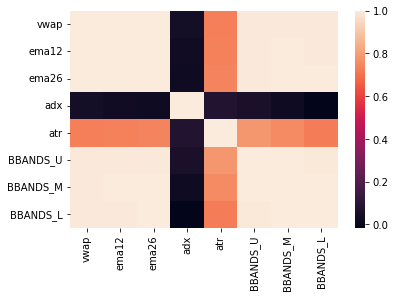

In [5]:
cor = dd.iloc[:,6:].corr()
import seaborn as sns
sns.heatmap(cor)

In [6]:
dd["returns1"] = dd["Close"].pct_change() 
dd["returns3"] = dd["Close"].pct_change(periods = 3)
dd["returns7"] = dd["Close"].pct_change(periods = 7)
dd['ema21'] = ta.EMA(data["Adj Close"],timeperiod = 21)

<AxesSubplot:>

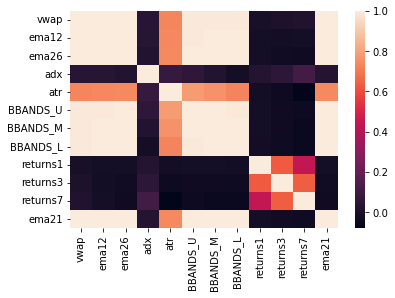

In [7]:
sns.heatmap(dd.iloc[:,6:].corr())

In [8]:
df = dd[["ema21","vwap","atr","returns1","returns3","returns7",'BBANDS_U','BBANDS_M','BBANDS_L']].dropna()
df.corr()

,ema21,vwap,atr,returns1,returns3,returns7,BBANDS_U,BBANDS_M,BBANDS_L
ema21,1.000000,0.997432,0.736901,-0.021138,-0.028717,-0.034283,0.996027,0.998545,0.996607
vwap,0.997432,1.000000,0.726060,-0.011235,0.003024,0.013873,0.992621,0.994778,0.992455
atr,0.736901,0.726060,1.000000,-0.024368,-0.042625,-0.079139,0.781855,0.756110,0.723848
returns1,-0.021138,-0.011235,-0.024368,1.000000,0.624942,0.436453,-0.022843,-0.024006,-0.025186
returns3,-0.028717,0.003024,-0.042625,0.624942,1.000000,0.637111,-0.033696,-0.035447,-0.037228
returns7,-0.034283,0.013873,-0.079139,0.436453,0.637111,1.000000,-0.044485,-0.047918,-0.051514
BBANDS_U,0.996027,0.992621,0.781855,-0.022843,-0.033696,-0.044485,1.000000,0.997983,0.990998
BBANDS_M,0.998545,0.994778,0.756110,-0.024006,-0.035447,-0.047918,0.997983,1.000000,0.997498
BBANDS_L,0.996607,0.992455,0.723848,-0.025186,-0.037228,-0.051514,0.990998,0.997498,1.000000


<AxesSubplot:>

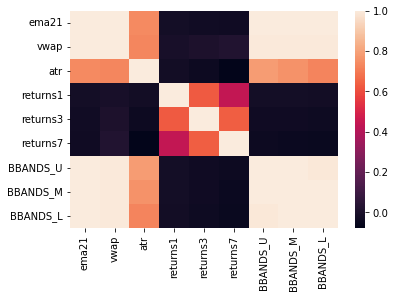

In [9]:
sns.heatmap(df.corr())

In [10]:
from statsmodels.tsa.stattools import adfuller
adfuller(df.iloc[:,0])

(0.9612310507681406,
 0.9938395719790822,
 18,
 3657,
 {'1%': -3.4321394164727073,
  '5%': -2.8623306646906066,
  '10%': -2.5671908827224343},
 10389.93649144419)

In [11]:
for i in range(0,df.shape[1] - 1):
    print(adfuller(df.iloc[:,i]))
    print('-'* 120)

(0.9612310507681406, 0.9938395719790822, 18, 3657, {'1%': -3.4321394164727073, '5%': -2.8623306646906066, '10%': -2.5671908827224343}, 10389.93649144419)
------------------------------------------------------------------------------------------------------------------------
(1.1913853455747838, 0.9959258202956044, 19, 3656, {'1%': -3.4321399062635227, '5%': -2.862330881042633, '10%': -2.5671909979009953}, 24413.978334389256)
------------------------------------------------------------------------------------------------------------------------
(-3.0069651350619244, 0.03424904420446567, 2, 3673, {'1%': -3.4321316161159983, '5%': -2.8623272190863336, '10%': -2.567189048399113}, 6886.745898047155)
------------------------------------------------------------------------------------------------------------------------
(-30.387318808362533, 0.0, 4, 3671, {'1%': -3.4321325874394772, '5%': -2.862327648143656, '10%': -2.5671892768146547}, -15796.965778902548)
-----------------------------------

In [12]:
df.iloc[:,0] = df.iloc[:,0] / df.iloc[:,0].rolling(window = 21).mean()
df = df.dropna()

In [13]:
adfuller(df.iloc[:,0])

(-8.26872116382361,
 4.858306685773469e-13,
 24,
 3631,
 {'1%': -3.4321522387754775,
  '5%': -2.862336328589075,
  '10%': -2.567193897993964},
 -32420.859781281186)

In [14]:
for i in range(1,df.shape[1] - 1):
    df.iloc[:,i] = df.iloc[:,i] / df.iloc[:,i].rolling(window = 21).mean()

In [15]:
df = df.dropna()

In [16]:
for i in range(0,df.shape[1] - 1):
    print(adfuller(df.iloc[:,i]))
    print('-'* 120)

(-8.25417506777418, 5.291791786273078e-13, 24, 3611, {'1%': -3.432162227822101, '5%': -2.862340740957934, '10%': -2.56719624699553}, -32226.480023830627)
------------------------------------------------------------------------------------------------------------------------
(-9.440633627381057, 4.905715156289023e-16, 20, 3615, {'1%': -3.4321602211641724, '5%': -2.8623398545767365, '10%': -2.56719577511483}, -21450.267917861962)
------------------------------------------------------------------------------------------------------------------------
(-13.596513941817445, 1.9902980639365918e-25, 10, 3625, {'1%': -3.4321552239077326, '5%': -2.8623376471853903, '10%': -2.5671945999714625}, -10231.079421587056)
------------------------------------------------------------------------------------------------------------------------
(-60.44022154574028, 0.0, 0, 3635, {'1%': -3.432150254165979, '5%': -2.8623354519441797, '10%': -2.567193431297053}, 50046.65217895084)
-----------------------------